In [1]:
import pathlib

import gymnasium as gym
from ray.rllib.algorithms.ppo import PPOConfig

from mfgrl.envs.mfgenv import MfgEnv

import numpy as np

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prepare config and load from checkpoint
checkpoint_path = "./checkpoints/PPO_MfgEnv_checkpoint_000500"

config = (
    PPOConfig()
    .environment(
        MfgEnv,
        env_config={
            "data_file": "data/data.json",
            "stochastic": True,
            "render_mode": None,
        },
    )
    .framework("torch")
    .rollouts(num_rollout_workers=1)
    .evaluation(evaluation_num_workers=1)
    .resources(num_gpus=0)
)
algo = config.build()
algo.restore(checkpoint_path=checkpoint_path)

You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
/Users/torayeff/.venv/playground/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/torayeff/.venv/playground/lib/python3.10/site-packages/tensorboardX/proto/resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/torayeff/

(RolloutWorker pid=25520) 2023-01-24 22:53:06,209	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=25520) 2023-01-24 22:53:06,209	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
(RolloutWorker pid=25520) 2023-01-24 22:53:06,214	INFO policy.py:1196 -- Policy (worker=1) running on CPU.
(RolloutWorker pid=25520) 2023-01-24 22:53:06,214	INFO torch_policy_v2.py:110 -- Found 0 visible cuda devices.


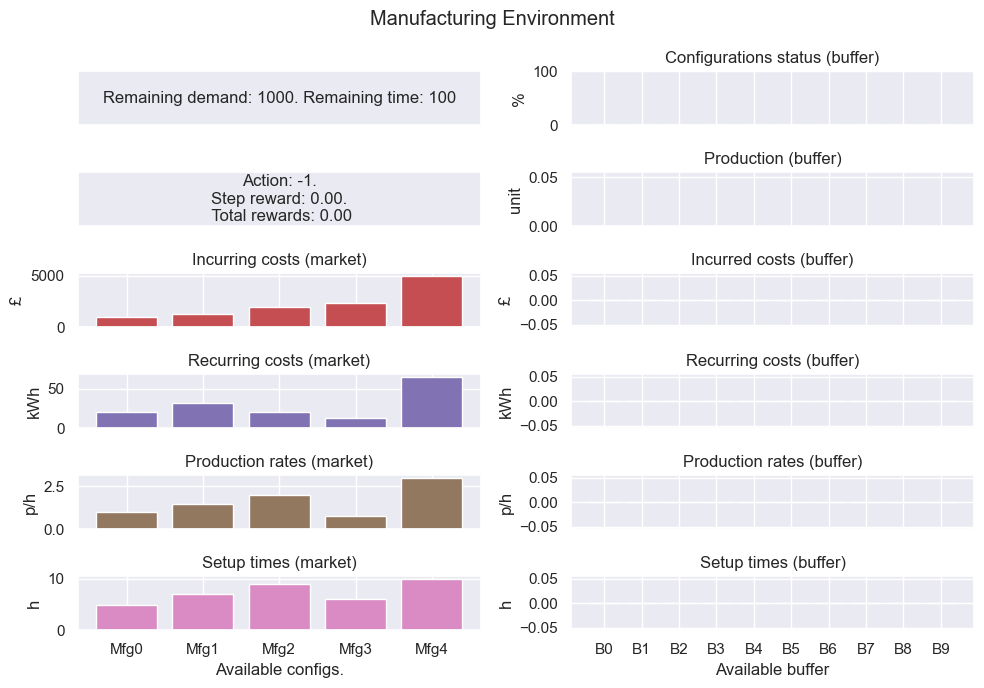

--------------------------------------------Start state---------------------------------------------
demand 1000.0
demand_time 100.0
incurred_costs [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
recurring_costs [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
production_rates [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
setup_times [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
cfgs_status [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
produced_counts [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
market_incurring_costs [1000. 1300. 2000. 2400. 5000.]
market_recurring_costs [20. 32. 20. 13. 65.]
market_production_rates [1.   1.5  2.   0.75 3.  ]
market_setup_times [ 5.  7.  9.  6. 10.]


In [4]:
# prepare environment
env_config = {
    "data_file": "data/data.json",
    "stochastic": True,
    "render_mode": "human",
}
env = gym.make("mfgrl:mfgrl/MfgEnv-v0", env_config=env_config)
obs, info = env.reset()
print("Start state".center(100, "-"))
for k, v in env.decode_obs(obs).items():
    print(k, v)

In [5]:
log = {
    "actions": [],
    "step_rewards": [],
    "infos": [],
    "remaining_demands": [],
    "remaining_times": []
}

# inference
total_reward = 0
steps = 0
while True:
    steps += 1

    action = algo.compute_single_action(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    # print("".center(100, "-"))
    # print(
    #     f"i={steps}, a={action}, r={reward}, term={terminated}, info={info}, "
    #     f"tr={total_reward}"
    # )
    # for k, v in env.decode_obs(obs).items():
    #     print(k, v)
    decoded_obs = env.decode_obs(obs)
    log["actions"].append(action)
    log["step_rewards"].append(reward)
    log["infos"].append(info)
    log["remaining_demands"].append(decoded_obs["demand"])
    log["remaining_times"].append(decoded_obs["demand_time"])
    
    if terminated:
        break

print(f"Total reward: {total_reward}")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Total reward: -33043.68291142378


In [6]:
remaining_times = log["remaining_times"][:-1] + [s["demand_time"] for s in log["infos"][-1]["states"]]
remaining_demands = log["remaining_demands"][:-1] + [s["demand"] for s in log["infos"][-1]["states"]]
step_rewards = log["step_rewards"][:-1] + log["infos"][-1]["step_rewards"]
actions = log["actions"] + [5] * (len(log["infos"][-1]["states"])-1)

In [7]:
decisions = []
times = []
ylocs = []
for i in range(len(actions)):
    if actions[i] != 5:
        decisions.append(actions[i])
        times.append(100 - remaining_times[i])
        ylocs.append(remaining_demands[i])

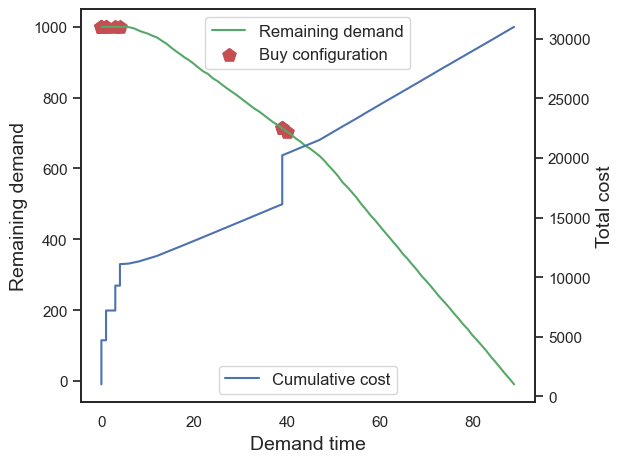

In [10]:
sns.set_style("white")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(100 - np.array(remaining_times), remaining_demands, "g-", label="Remaining demand")
ax1.set_xlabel("Demand time", fontsize=14)
ax1.set_ylabel("Remaining demand", fontsize=14)

ax1.scatter(times, ylocs, label="Buy configuration", color="r", marker="p", s=100)

ax2.plot(100 - np.array(remaining_times), -1.0 * np.cumsum(step_rewards), "b-", label="Cumulative cost")
ax2.set_ylabel("Total cost", fontsize=14)

ax1.legend(loc="upper center", fontsize=12)
ax2.legend(loc="lower center", fontsize=12)

plt.tight_layout()
plt.savefig("coolfigure.pdf")
plt.show()